# Earth Quake Analysis

In [1]:
# Importing the dependencies:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
eq=pd.read_csv(r'F:\courses\data set\earth quake\Global_Earthquake_Data.csv') # Importing the dataset

In [4]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.0,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.8,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.9,mb,45.0,77.0,1.223,0.82,...,2023-02-27T00:21:32.040Z,NaN,earthquake,6.27,1.869,0.086,42.0,reviewed,us,us
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.6,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.5,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us


In [5]:
eq.columns # Column Names

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
eq.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283132 entries, 0 to 283131
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             283132 non-null  object 
 1   latitude         283132 non-null  float64
 2   longitude        283132 non-null  float64
 3   depth            282540 non-null  float64
 4   mag              283132 non-null  float64
 5   magType          283131 non-null  object 
 6   nst              94296 non-null   float64
 7   gap              144360 non-null  float64
 8   dmin             71103 non-null   float64
 9   rms              234815 non-null  float64
 10  net              283132 non-null  object 
 11  id               283132 non-null  object 
 12  updated          283132 non-null  object 
 13  place            282285 non-null  object 
 14  type             283132 non-null  object 
 15  horizontalError  64013 non-null   float64
 16  depthError       146269 non-null  floa

In [7]:
eq.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,283132.000000,283132.000000,282540.000000,283132.000000,94296.000000,144360.000000,71103.000000,234815.000000,64013.000000,146269.000000,84886.000000,198002.000000
mean,4.381654,41.885638,69.795117,4.941265,82.707856,94.920725,4.518542,0.945888,8.403049,10.856471,0.137394,32.212872
std,29.459783,120.757518,115.794205,0.486020,96.171475,48.008934,5.793901,0.330535,4.902638,965.064825,0.112922,53.060711
min,-84.133000,-179.999700,-4.000000,3.380000,0.000000,6.500000,0.000000,-1.000000,0.014000,-1.000000,0.000000,0.000000
25%,-17.426025,-71.499000,10.000000,4.600000,25.000000,59.000000,1.308000,0.790000,6.200000,2.000000,0.068000,6.000000
50%,0.791000,99.178000,33.000000,4.800000,47.000000,89.000000,2.668000,0.940000,8.000000,5.700000,0.102000,15.000000
75%,29.909250,142.308000,60.792500,5.100000,100.000000,123.300000,5.243500,1.100000,10.170000,9.800000,0.173000,35.000000
max,87.386000,180.000000,700.900000,9.500000,934.000000,360.000000,62.626000,69.320000,99.000000,367558.100000,1.840000,941.000000


In [8]:
# Statistical measures of Column(Depth)
eq.depth.median()
eq[{'nst','gap','rms','horizontalError','depthError','magError','magNst','dmin'}].median()

magNst             15.000
dmin                2.668
horizontalError     8.000
depthError          5.700
gap                89.000
nst                47.000
magError            0.102
rms                 0.940
dtype: float64

# top 10 magnitude types of earthquake

<AxesSubplot:>

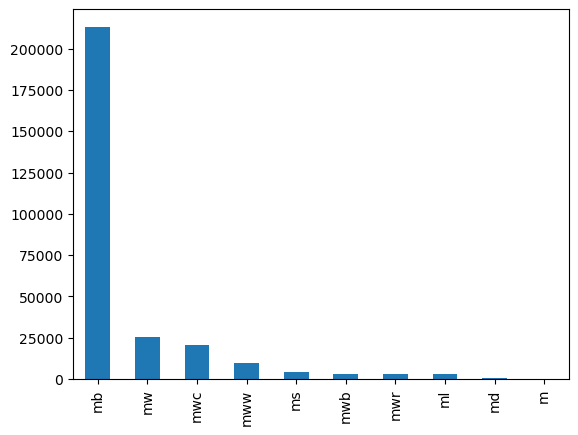

In [9]:
eq['magType'].value_counts().head(10).plot.bar()

through this, we get to know that mb magtype happens more often than any other type of EQ. this means that magnitude scale in between 4 to 6.5 is happening more.

<AxesSubplot:>

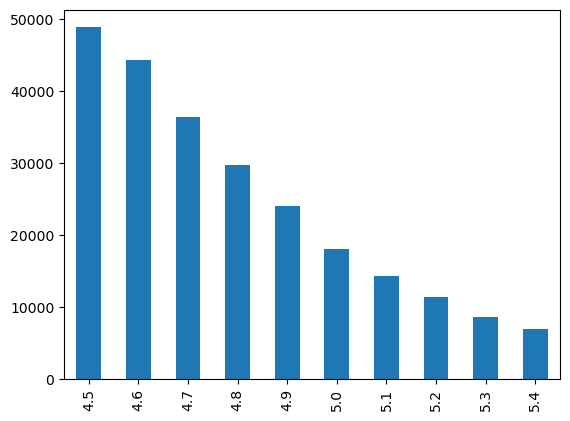

In [10]:
eq['mag'].value_counts().head(10).plot.bar()

this tells the exact value of earthquake magnitude which is 4.5 that is happening more than any other magnitude scale

<AxesSubplot:>

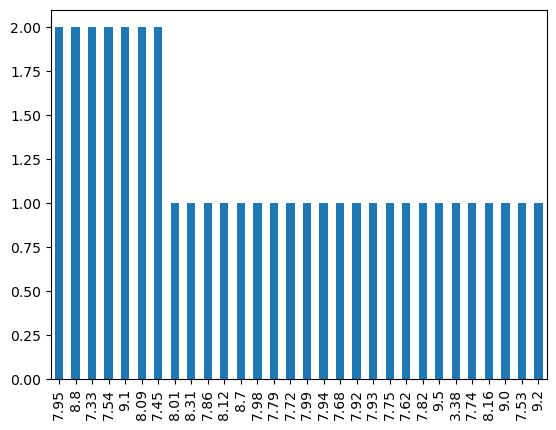

In [11]:
eq['mag'].value_counts().tail(30).plot.bar()

<AxesSubplot:>

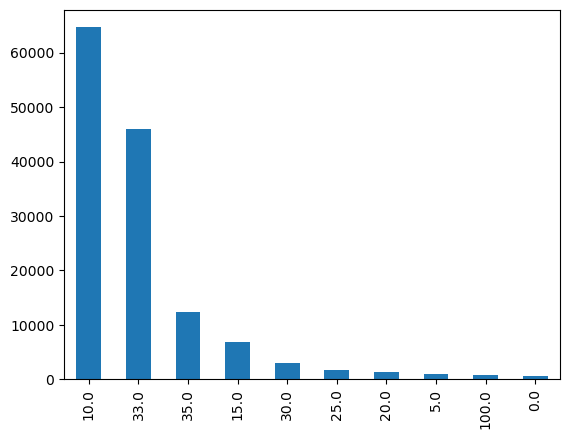

In [12]:
eq['depth'].value_counts().head(10).plot.bar()

it is found by above code that the most frequent depth is 10 so we will fill the NaN value with 10

In [13]:
eq['gap'].fillna(94.9,inplace=True)

In [14]:
# NaN values of Features:
eq.isnull().sum()

time                    0
latitude                0
longitude               0
depth                 592
mag                     0
magType                 1
nst                188836
gap                     0
dmin               212029
rms                 48317
net                     0
id                      0
updated                 0
place                 847
type                    0
horizontalError    219119
depthError         136863
magError           198246
magNst              85130
status                  0
locationSource          0
magSource               0
dtype: int64

In [15]:
# Filling the NaN value of Features:
eq['depth'].fillna(33,inplace=True)
eq['gap'].fillna(94.9,inplace=True)
eq['nst'].fillna(82.7,inplace=True)
eq['rms'].fillna(0.94,inplace=True)
eq['horizontalError'].fillna(8.0,inplace=True)
eq['depthError'].fillna(5.7,inplace=True)
eq['magError'].fillna(0.102,inplace=True)
eq['magNst'].fillna(15.0,inplace=True)
eq['dmin'].fillna(2.668,inplace=True)

In [16]:
# Droping the NaN value of Place:
eq.dropna(axis=0,how='any',inplace=True)

In [17]:
eq.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [18]:
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us
6,2023-02-26T15:08:14.122Z,-20.6362,-178.3171,544.121,4.60,mb,31.0,79.0,2.959,0.56,...,2023-02-26T17:13:55.040Z,Fiji region,earthquake,15.30,8.556,0.084,42.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283127,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,8.00,25.000,0.300,15.0,reviewed,iscgem,iscgem
283128,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:36:39.809Z,"10 km WNW of Byt?a, Slovakia",earthquake,8.00,3.500,0.650,15.0,reviewed,iscgem,iscgem
283129,1906-01-08T00:15:00.000Z,39.3000,-96.6000,33.000,4.90,fa,82.7,94.9,2.668,0.94,...,2018-06-04T20:43:44.000Z,Kansas,earthquake,8.00,5.700,0.102,15.0,reviewed,ushis,bar
283130,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:39:47.898Z,"216 km WNW of Attu Station, Alaska",earthquake,8.00,3.500,0.200,15.0,reviewed,iscgem,iscgem


In [19]:
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us
6,2023-02-26T15:08:14.122Z,-20.6362,-178.3171,544.121,4.60,mb,31.0,79.0,2.959,0.56,...,2023-02-26T17:13:55.040Z,Fiji region,earthquake,15.30,8.556,0.084,42.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283127,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,8.00,25.000,0.300,15.0,reviewed,iscgem,iscgem
283128,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:36:39.809Z,"10 km WNW of Byt?a, Slovakia",earthquake,8.00,3.500,0.650,15.0,reviewed,iscgem,iscgem
283129,1906-01-08T00:15:00.000Z,39.3000,-96.6000,33.000,4.90,fa,82.7,94.9,2.668,0.94,...,2018-06-04T20:43:44.000Z,Kansas,earthquake,8.00,5.700,0.102,15.0,reviewed,ushis,bar
283130,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:39:47.898Z,"216 km WNW of Attu Station, Alaska",earthquake,8.00,3.500,0.200,15.0,reviewed,iscgem,iscgem


In [20]:
eq=eq.reset_index(drop=True)

In [21]:
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
3,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us
4,2023-02-26T15:08:14.122Z,-20.6362,-178.3171,544.121,4.60,mb,31.0,79.0,2.959,0.56,...,2023-02-26T17:13:55.040Z,Fiji region,earthquake,15.30,8.556,0.084,42.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282279,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,8.00,25.000,0.300,15.0,reviewed,iscgem,iscgem
282280,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:36:39.809Z,"10 km WNW of Byt?a, Slovakia",earthquake,8.00,3.500,0.650,15.0,reviewed,iscgem,iscgem
282281,1906-01-08T00:15:00.000Z,39.3000,-96.6000,33.000,4.90,fa,82.7,94.9,2.668,0.94,...,2018-06-04T20:43:44.000Z,Kansas,earthquake,8.00,5.700,0.102,15.0,reviewed,ushis,bar
282282,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:39:47.898Z,"216 km WNW of Attu Station, Alaska",earthquake,8.00,3.500,0.200,15.0,reviewed,iscgem,iscgem


In [22]:
eq.rename(columns={'time':'dateTime'},inplace=True) #  Renaming the column name from time to dateTime

In [23]:
eq['dateTime'].astype('datetime64[s]').reset_index() # Changing the data type

,index,dateTime
0,0,2023-02-26 23:58:05
1,1,2023-02-26 23:33:17
2,2,2023-02-26 21:35:01
3,3,2023-02-26 18:58:54
4,4,2023-02-26 15:08:14
...,...,...
282279,282279,1906-01-21 13:49:33
282280,282280,1906-01-09 23:04:45
282281,282281,1906-01-08 00:15:00
282282,282282,1906-01-06 21:31:33


In [24]:
eq


,dateTime,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
3,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us
4,2023-02-26T15:08:14.122Z,-20.6362,-178.3171,544.121,4.60,mb,31.0,79.0,2.959,0.56,...,2023-02-26T17:13:55.040Z,Fiji region,earthquake,15.30,8.556,0.084,42.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282279,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,8.00,25.000,0.300,15.0,reviewed,iscgem,iscgem
282280,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:36:39.809Z,"10 km WNW of Byt?a, Slovakia",earthquake,8.00,3.500,0.650,15.0,reviewed,iscgem,iscgem
282281,1906-01-08T00:15:00.000Z,39.3000,-96.6000,33.000,4.90,fa,82.7,94.9,2.668,0.94,...,2018-06-04T20:43:44.000Z,Kansas,earthquake,8.00,5.700,0.102,15.0,reviewed,ushis,bar
282282,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58,mw,82.7,94.9,2.668,0.94,...,2022-04-25T20:39:47.898Z,"216 km WNW of Attu Station, Alaska",earthquake,8.00,3.500,0.200,15.0,reviewed,iscgem,iscgem


In [25]:
# Segregating the Date, Month, Yearand Time from dateTime column
eq['year']=pd.DatetimeIndex(eq['dateTime']).year 
eq['month']=pd.DatetimeIndex(eq['dateTime']).month
eq['day']=pd.DatetimeIndex(eq['dateTime']).day
eq['time']=pd.to_datetime(eq['dateTime']).dt.time

In [26]:
eq.columns

Index(['dateTime', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'year', 'month', 'day', 'time'],
      dtype='object')

In [27]:
eq['type']

0         earthquake
1         earthquake
2         earthquake
3         earthquake
4         earthquake
             ...    
282279    earthquake
282280    earthquake
282281    earthquake
282282    earthquake
282283    earthquake
Name: type, Length: 282284, dtype: object

In [28]:
eq


,dateTime,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,year,month,day,time
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00,mb,46.0,91.0,1.293,0.80,...,1.897,0.078,52.0,reviewed,us,us,2023,2,26,23:58:05.052000
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80,mb,67.0,85.0,5.158,0.95,...,7.539,0.043,165.0,reviewed,us,us,2023,2,26,23:33:17.641000
2,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60,mb,51.0,217.0,5.661,0.57,...,1.984,0.038,205.0,reviewed,us,us,2023,2,26,21:35:01.303000
3,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50,mb,108.0,62.0,2.866,0.82,...,5.863,0.059,84.0,reviewed,us,us,2023,2,26,18:58:54.828000
4,2023-02-26T15:08:14.122Z,-20.6362,-178.3171,544.121,4.60,mb,31.0,79.0,2.959,0.56,...,8.556,0.084,42.0,reviewed,us,us,2023,2,26,15:08:14.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282279,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40,mw,82.7,94.9,2.668,0.94,...,25.000,0.300,15.0,reviewed,iscgem,iscgem,1906,1,21,13:49:33.570000
282280,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63,mw,82.7,94.9,2.668,0.94,...,3.500,0.650,15.0,reviewed,iscgem,iscgem,1906,1,9,23:04:45.570000
282281,1906-01-08T00:15:00.000Z,39.3000,-96.6000,33.000,4.90,fa,82.7,94.9,2.668,0.94,...,5.700,0.102,15.0,reviewed,ushis,bar,1906,1,8,00:15:00
282282,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58,mw,82.7,94.9,2.668,0.94,...,3.500,0.200,15.0,reviewed,iscgem,iscgem,1906,1,6,21:31:33.220000


In [29]:
# the number of years of the data present in data set:
eq.year.unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980,
       1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947,
       1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936,
       1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925,
       1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914,
       1913, 1912, 1911, 1910, 1909, 1908, 1907, 1906], dtype=int64)

The data is from "1906 to 2022"

<AxesSubplot:>

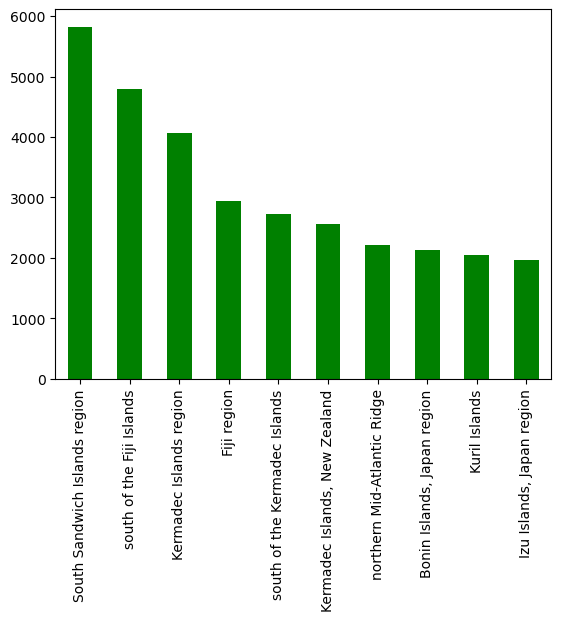

In [30]:
# Checking which place has more number of Earthquake in these Years:
eq.place.value_counts().head(10).plot(kind='bar',color='green')

The graph shows that South Sandwich Island region has more earthquake from 1906 to 2022

# eliminate the columns not necessary using heat map.

<AxesSubplot:>

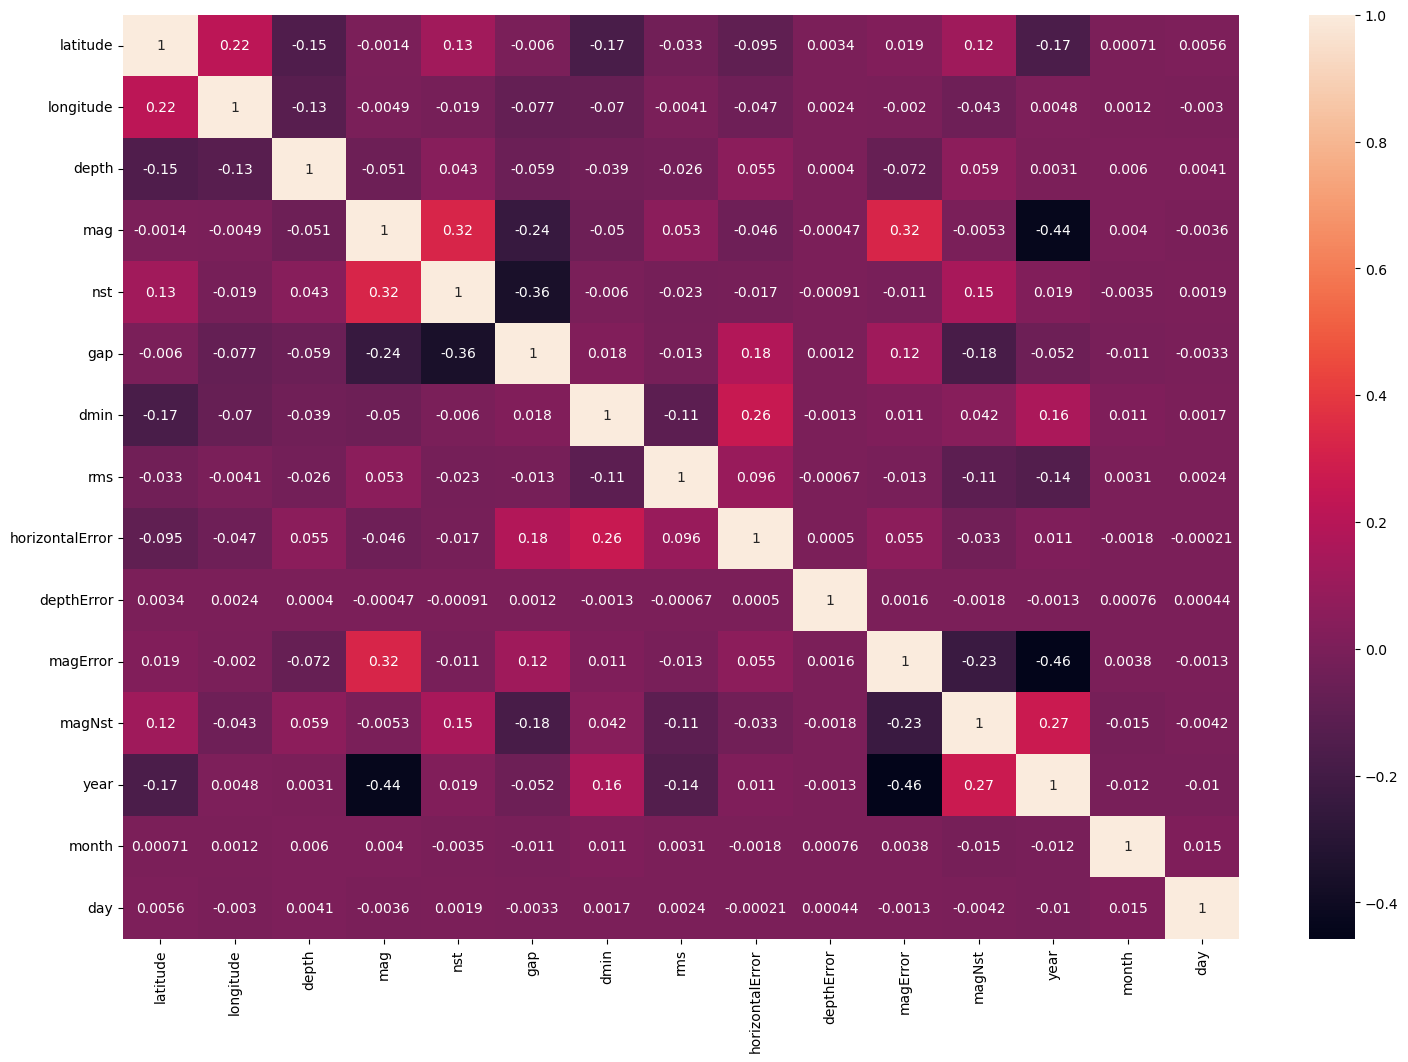

In [31]:
plt.figure(figsize=(18,12))
sns.heatmap(eq.corr(),annot=True)

In [32]:
eq1=eq.drop(['depth','status','type','net','dateTime','id','magType','updated','locationSource', 'magSource','locationSource', 'magSource'],axis=1)

In [33]:
eq1=eq1.drop(['place'],axis=1) 

In [34]:
eq1

,latitude,longitude,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day,time
0,41.8050,79.8675,5.00,46.0,91.0,1.293,0.80,6.59,1.897,0.078,52.0,2023,2,26,23:58:05.052000
1,18.7420,145.4868,4.80,67.0,85.0,5.158,0.95,10.27,7.539,0.043,165.0,2023,2,26,23:33:17.641000
2,14.9364,-104.5563,4.60,51.0,217.0,5.661,0.57,11.79,1.984,0.038,205.0,2023,2,26,21:35:01.303000
3,44.6730,146.5159,4.50,108.0,62.0,2.866,0.82,8.66,5.863,0.059,84.0,2023,2,26,18:58:54.828000
4,-20.6362,-178.3171,4.60,31.0,79.0,2.959,0.56,15.30,8.556,0.084,42.0,2023,2,26,15:08:14.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282279,34.1750,138.0250,7.40,82.7,94.9,2.668,0.94,8.00,25.000,0.300,15.0,1906,1,21,13:49:33.570000
282280,49.2560,18.4210,5.63,82.7,94.9,2.668,0.94,8.00,3.500,0.650,15.0,1906,1,9,23:04:45.570000
282281,39.3000,-96.6000,4.90,82.7,94.9,2.668,0.94,8.00,5.700,0.102,15.0,1906,1,8,00:15:00
282282,53.4180,170.1000,6.58,82.7,94.9,2.668,0.94,8.00,3.500,0.200,15.0,1906,1,6,21:31:33.220000


In [35]:
eq1.isnull().sum()

latitude           0
longitude          0
mag                0
nst                0
gap                0
dmin               0
rms                0
horizontalError    0
depthError         0
magError           0
magNst             0
year               0
month              0
day                0
time               0
dtype: int64

In [36]:
eq1['mag'].value_counts() # all the types of magnitude of earthquake

4.50    48702
4.60    44177
4.70    36321
4.80    29708
4.90    23997
        ...  
7.74        1
8.31        1
7.68        1
9.20        1
3.38        1
Name: mag, Length: 364, dtype: int64

In [37]:
eq1.isnull().sum()

latitude           0
longitude          0
mag                0
nst                0
gap                0
dmin               0
rms                0
horizontalError    0
depthError         0
magError           0
magNst             0
year               0
month              0
day                0
time               0
dtype: int64

# Modelling the data:

In [38]:
# Importing the data modeling libraries:
from sklearn.model_selection import train_test_split

In [39]:
# segregating the train and test data:
train=eq1.drop(['latitude', 'longitude', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst', 'time','mag'],axis=1)
test=eq1[['mag','longitude','latitude']]

In [40]:
# changing the data type of the data:
# train=train['mag'].astype('int32')
# test=test['mag'].astype('int32')

In [41]:
train.shape

(282284, 3)

In [42]:
test.shape

(282284, 3)

In [43]:
test

,mag,longitude,latitude
0,5.00,79.8675,41.8050
1,4.80,145.4868,18.7420
2,4.60,-104.5563,14.9364
3,4.50,146.5159,44.6730
4,4.60,-178.3171,-20.6362
...,...,...,...
282279,7.40,138.0250,34.1750
282280,5.63,18.4210,49.2560
282281,4.90,-96.6000,39.3000
282282,6.58,170.1000,53.4180


In [44]:
# splitting the train and test data into Xtrain,ytrain,xtest,ytest:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.3)

In [45]:
x_train

,year,month,day
276791,1938,11,13
30969,2019,1,4
65315,2014,4,18
261297,1974,5,23
191075,1992,9,10
...,...,...,...
106686,2008,9,20
30254,2019,2,7
269298,1966,5,14
47665,2016,9,2


In [46]:
y_test

,mag,longitude,latitude
149393,4.9,-178.6350,-33.533000
84245,4.6,132.0210,-6.374000
113971,4.7,-74.1840,-8.375000
241270,4.5,-122.1865,46.202333
145358,4.6,-79.5860,7.222000
...,...,...,...
231757,4.7,131.3410,31.901000
229748,5.3,154.3000,-5.572000
137218,4.6,152.7700,46.854000
215488,4.5,126.6340,1.920000


In [47]:
# importing the modeling technique from sklearn to train the model:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

# Predicting the output from data:

In [48]:
x_test

,year,month,day
149393,2002,1,27
84245,2011,9,10
113971,2007,8,20
241270,1980,3,29
145358,2002,11,19
...,...,...,...
231757,1983,1,13
229748,1983,7,3
137218,2004,6,2
215488,1986,10,15


In [49]:
model.predict([[2016,9,26]])

array([[ 4.71578947, 35.25234211, -6.04247368]])

In [50]:
y_test

,mag,longitude,latitude
149393,4.9,-178.6350,-33.533000
84245,4.6,132.0210,-6.374000
113971,4.7,-74.1840,-8.375000
241270,4.5,-122.1865,46.202333
145358,4.6,-79.5860,7.222000
...,...,...,...
231757,4.7,131.3410,31.901000
229748,5.3,154.3000,-5.572000
137218,4.6,152.7700,46.854000
215488,4.5,126.6340,1.920000


In [51]:
y_pred=model.predict(x_test)

In [71]:
y_pred[0][2]

4.485874999999998

In [52]:
# Evaluating metric is being imported to check the accuracy of the predictions:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [53]:
for i in range(1,20):
    print(model.score(y_pred,y_test)*100)

-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176
-309.7531059811176


The prediction accuracy is 77 percent. it means that this model will predict the magnitude of the earthquake in future with the accuracy of 77%.

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [55]:
error=np.sqrt(mse)

In [56]:
error

73.37124483291089

In [57]:
from sklearn.metrics import mean_absolute_error
    

In [58]:
mae = mean_absolute_error(y_test,y_pred)

In [59]:
mae 


41.695803499631495

# Saving the Train Model

In [ ]:
import pickle

In [61]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

In [62]:
#loading saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))